# Creating Mask Dataset based on COCO Format

In [73]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../") # go to parent dir

from utils.coco_manager import MaskManager

#import my_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
m = MaskManager(dataset_config_path = "/home/redne/mnt/project_zero/project_zero/ds1/experiments/dataset_config/")
m.set_resave_mask(new_mask_path="/home/redne/mnt/project_zero/project_zero/ds1/masks/")

In [75]:
train_set, val_set = m.make_datapath_list('/home/redne/mnt/project_zero/project_zero/ds1/parsed/')

print(f'train set count: {len(train_set)}\nvalidaiton set count: {len(val_set)}')

train set count: 449
validaiton set count: 51


In [80]:
m.custom_classes_flag

False

In [5]:
m.start(phase="train", mask_paths=train_set)

there are 449 images
quering image masks from: /home/redne/mnt/project_zero/project_zero/ds1/masks/iter9_InstanceGroup2Desccamera_0camera_Shape0mask_.png


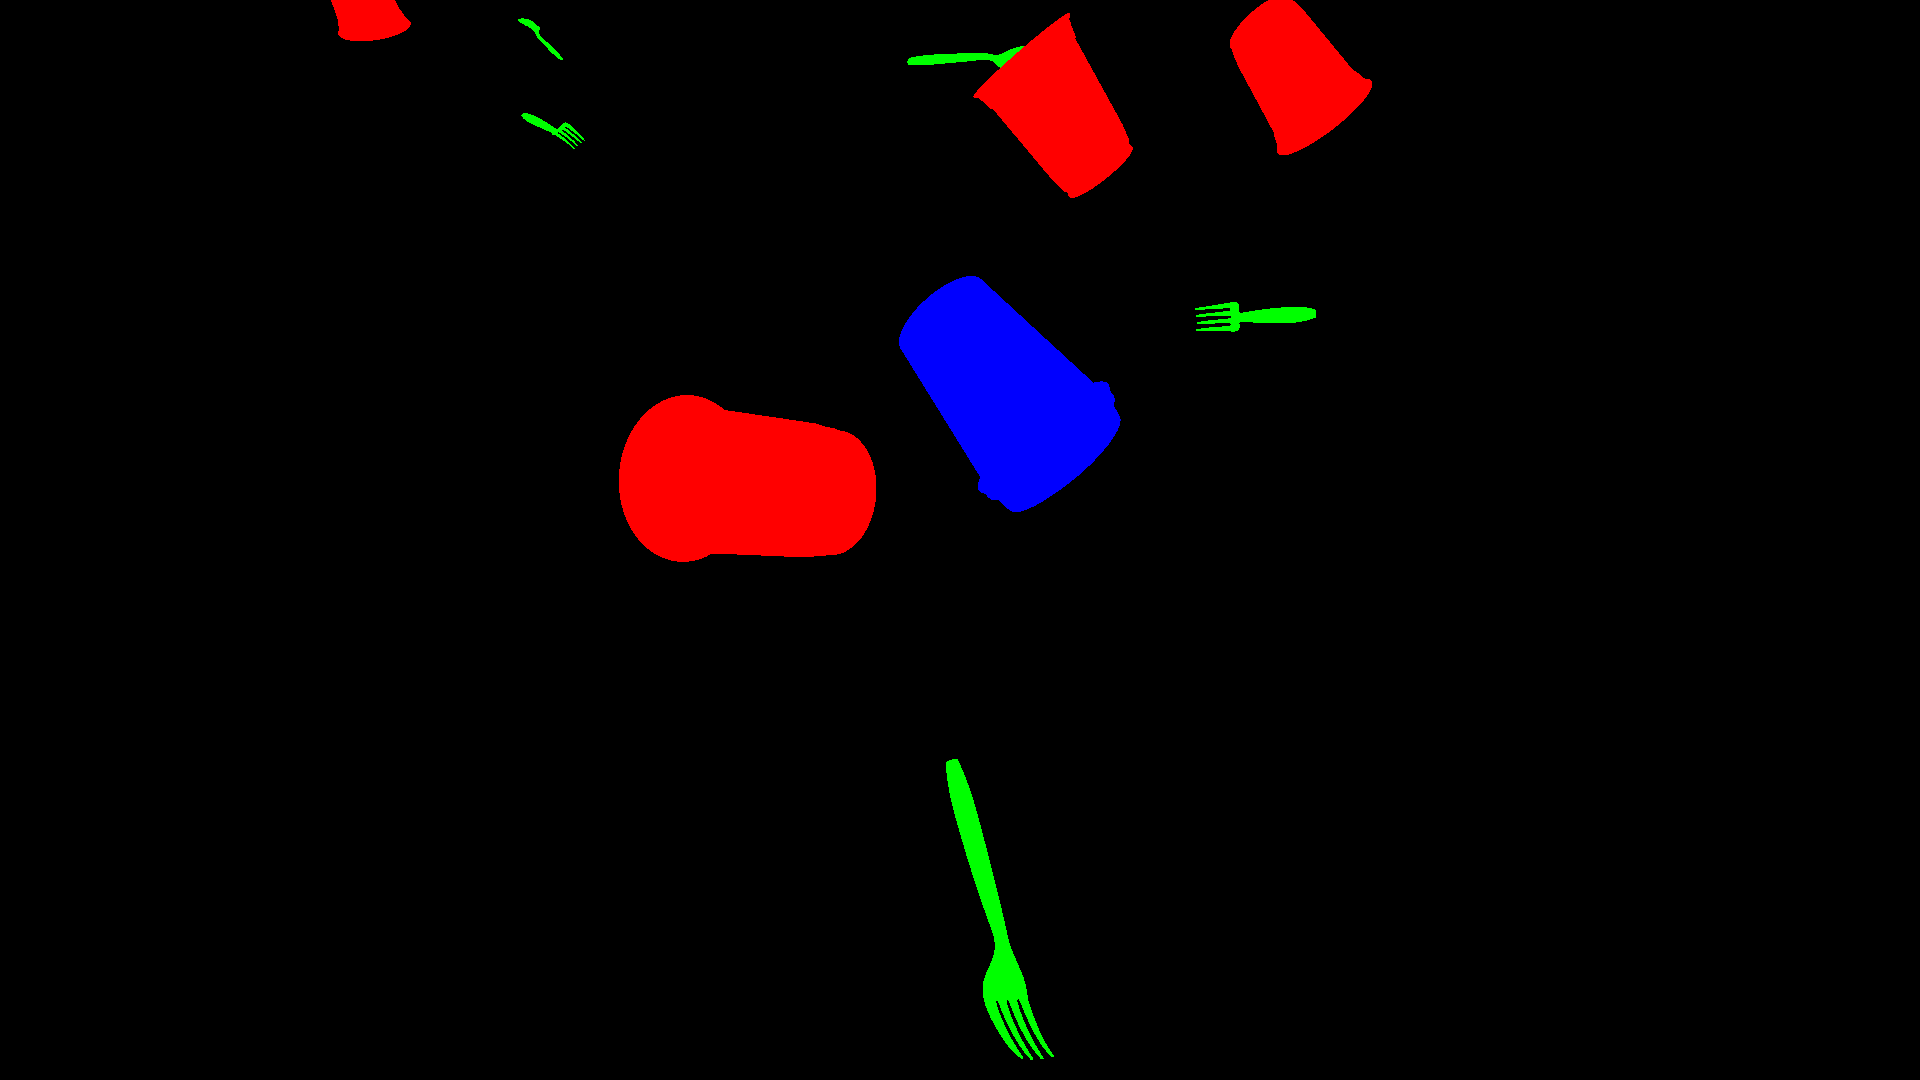

In [12]:
print(f'there are {len(m.masks)} images')
m.show_mask_img(len(m.masks)-1)

there are 5 images
quering image masks from: /home/redne/mnt/project_zero/project_zero/ds1/masks/iter103_InstanceGroup2Desccamera_0camera_Shape0mask_.png


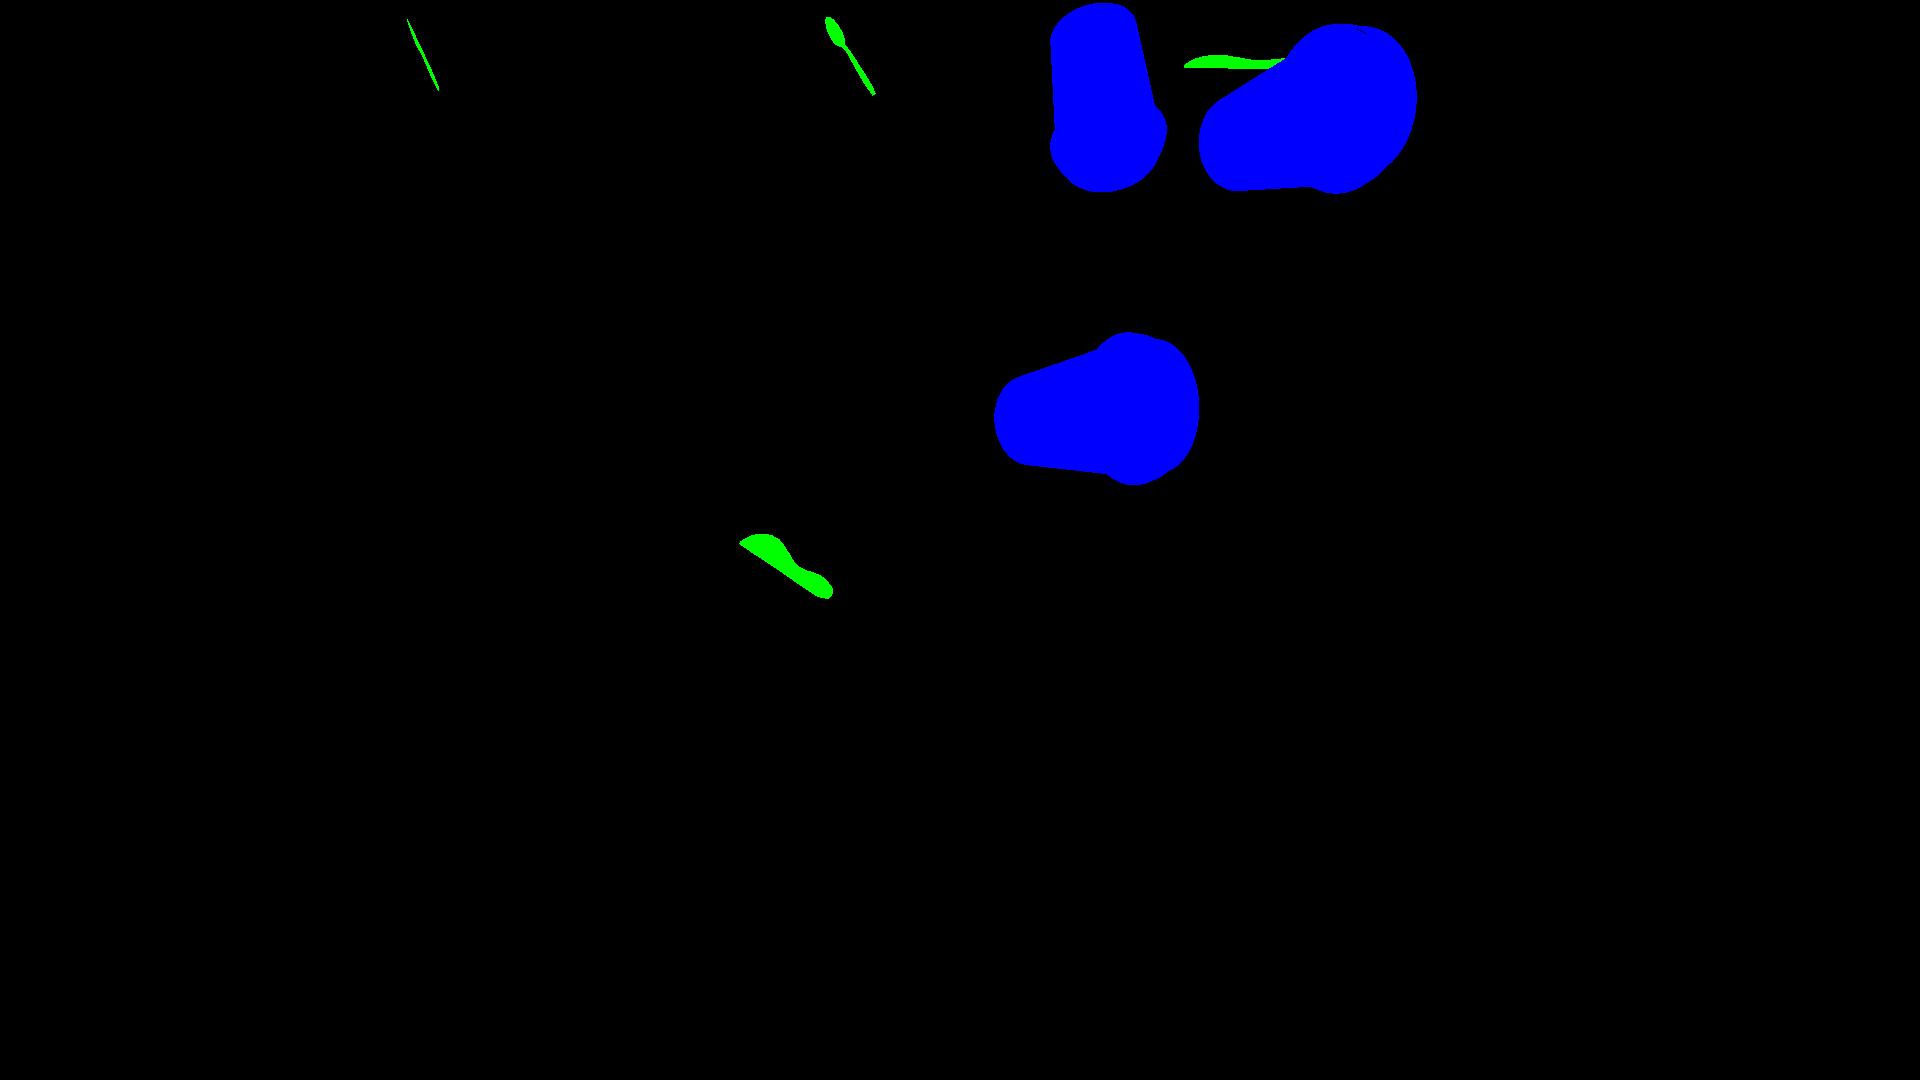

In [76]:
m.start(phase="val", mask_paths=val_set[:5])
print(f'there are {len(m.masks)} images')
m.show_mask_img(len(m.masks)-1)

In [77]:
m.dataset_config_path = "/home/redne/ZeroWaste3D/InstnaceSegmentation/mrcnn/notebooks/dev/test/"
m.write_masks_to_json(phase="testter")

In [78]:
from utils import coco_json_utils as cjutils
cjc = cjutils.CocoJsonCreator()

mask_file_name='testter'
class my_args:
    #mask_definition = f'/home/redne/mnt/project_zero/project_zero/ds1/experiments/dataset_config/{mask_file_name}_mask_definitions.json'
    mask_definition = f"/home/redne/ZeroWaste3D/InstnaceSegmentation/mrcnn/notebooks/dev/test/{mask_file_name}_mask_definitions.json"
    dataset_info = '/home/redne/mnt/project_zero/project_zero/ds1/experiments/dataset_config/dataset_info.json'
    phase = mask_file_name
    #dataset_config_path = f'/home/redne/mnt/project_zero/project_zero/ds1/experiments/dataset_config/test_delete/'
    dataset_config_path = './dev/test/test'
args = my_args()

cjc.main(args)

  0%|          | 0/5 [00:00<?, ?it/s]

Processing 5 mask definitions...


 40%|████      | 2/5 [00:05<00:08,  2.75s/it]

category color not found: (0, 0, 255); check for missing category or antialiasing
did not find: (0, 0, 255) on 1


 60%|██████    | 3/5 [00:07<00:05,  2.68s/it]

category color not found: (0, 0, 255); check for missing category or antialiasing
did not find: (0, 0, 255) on 2


 80%|████████  | 4/5 [00:10<00:02,  2.66s/it]

category color not found: (0, 0, 255); check for missing category or antialiasing
did not find: (0, 0, 255) on 3


100%|██████████| 5/5 [00:13<00:00,  2.64s/it]

category color not found: (0, 0, 255); check for missing category or antialiasing
did not find: (0, 0, 255) on 4
Annotations successfully written to file:
./dev/test/testtestter_coco_instances.json


In [57]:
m.masks.get(image_ids[0])

{'mask': '/home/redne/mnt/project_zero/project_zero/ds1/masks/iter263_InstanceGroup2Desccamera_0camera_Shape0mask_.png',
 'color_categories': {'(0, 255, 0)': {'category': 'fork',
   'super_category': 'fork'},
  '(255, 0, 0)': {'category': 'coffeeCup', 'super_category': 'coffeeCup'},
  '(0, 0, 255)': {'category': 'clearCup', 'super_category': 'clearCup'}}}

array(['/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter431_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg',
       '/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter417_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg',
       '/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter67_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg',
       '/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter241_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg'],
      dtype='<U108')

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

In [53]:
m.masks['/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter431_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg']

{'mask': '/home/redne/mnt/project_zero/project_zero/ds1/masks/iter431_InstanceGroup2Desccamera_0camera_Shape0mask_.png',
 'color_categories': {'(255, 0, 0)': {'category': 'coffeeCup',
   'super_category': 'coffeeCup'},
  '(0, 255, 0)': {'category': 'spoon', 'super_category': 'spoon'},
  '(0, 0, 255)': {'category': 'clearCup', 'super_category': 'clearCup'}}}

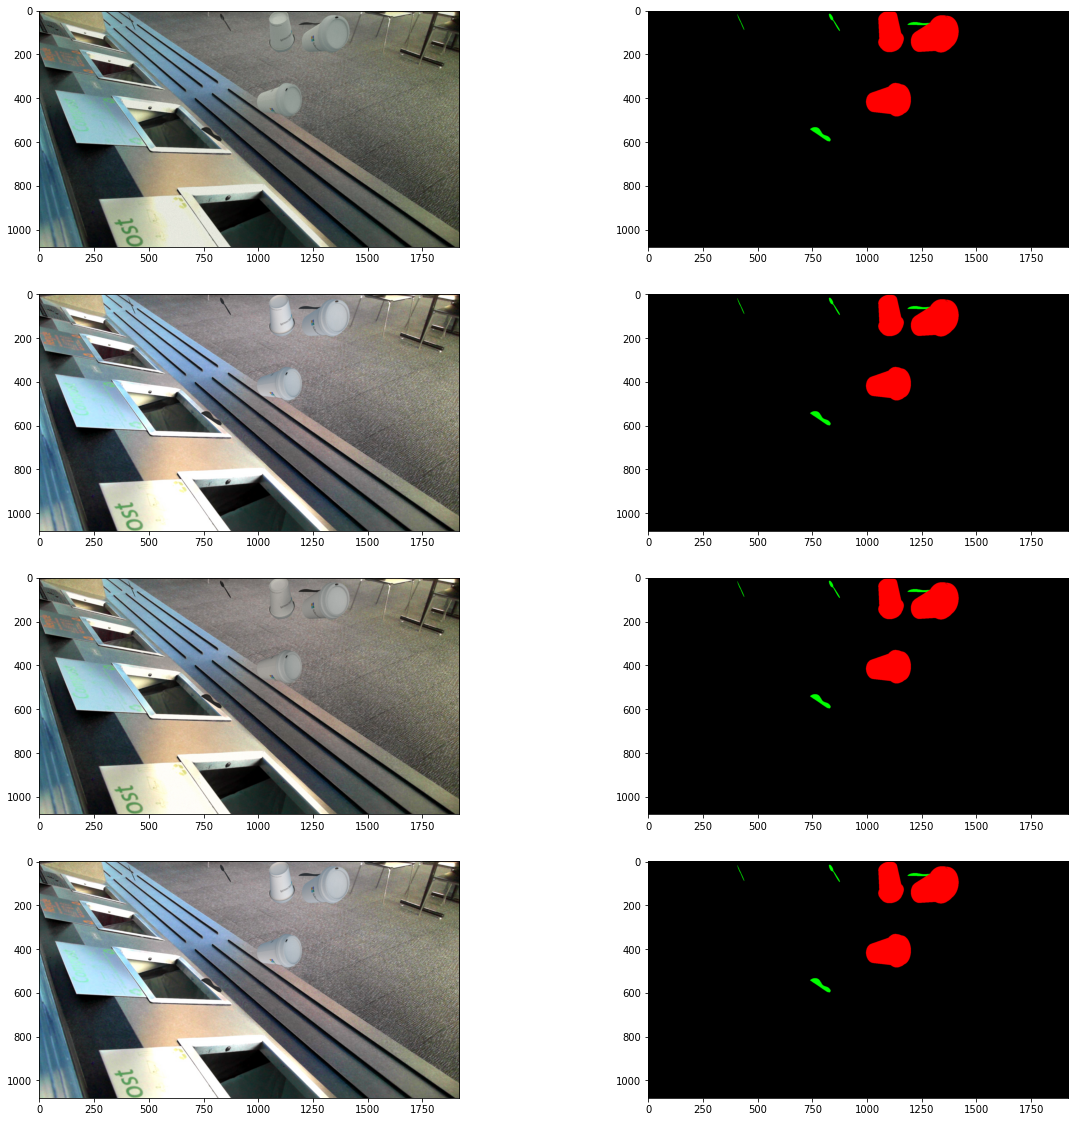

In [79]:
image_ids = np.random.choice(list(m.masks.keys()), 4)
image_ids

imgs = []
#for i in l1[:4]:
for i in image_ids:
    im = cv2.imread(i)
    im_mask = cv2.imread(m.masks[i]['mask'])
    imgs.append(im)
    imgs.append(im_mask)

n_row = 4
n_col = 2
_, axs = plt.subplots(n_row, n_col, figsize=(20, 20))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()

In [8]:
m.write_masks_to_json(phase="train")

##### Validation Data Set

there are 51 images


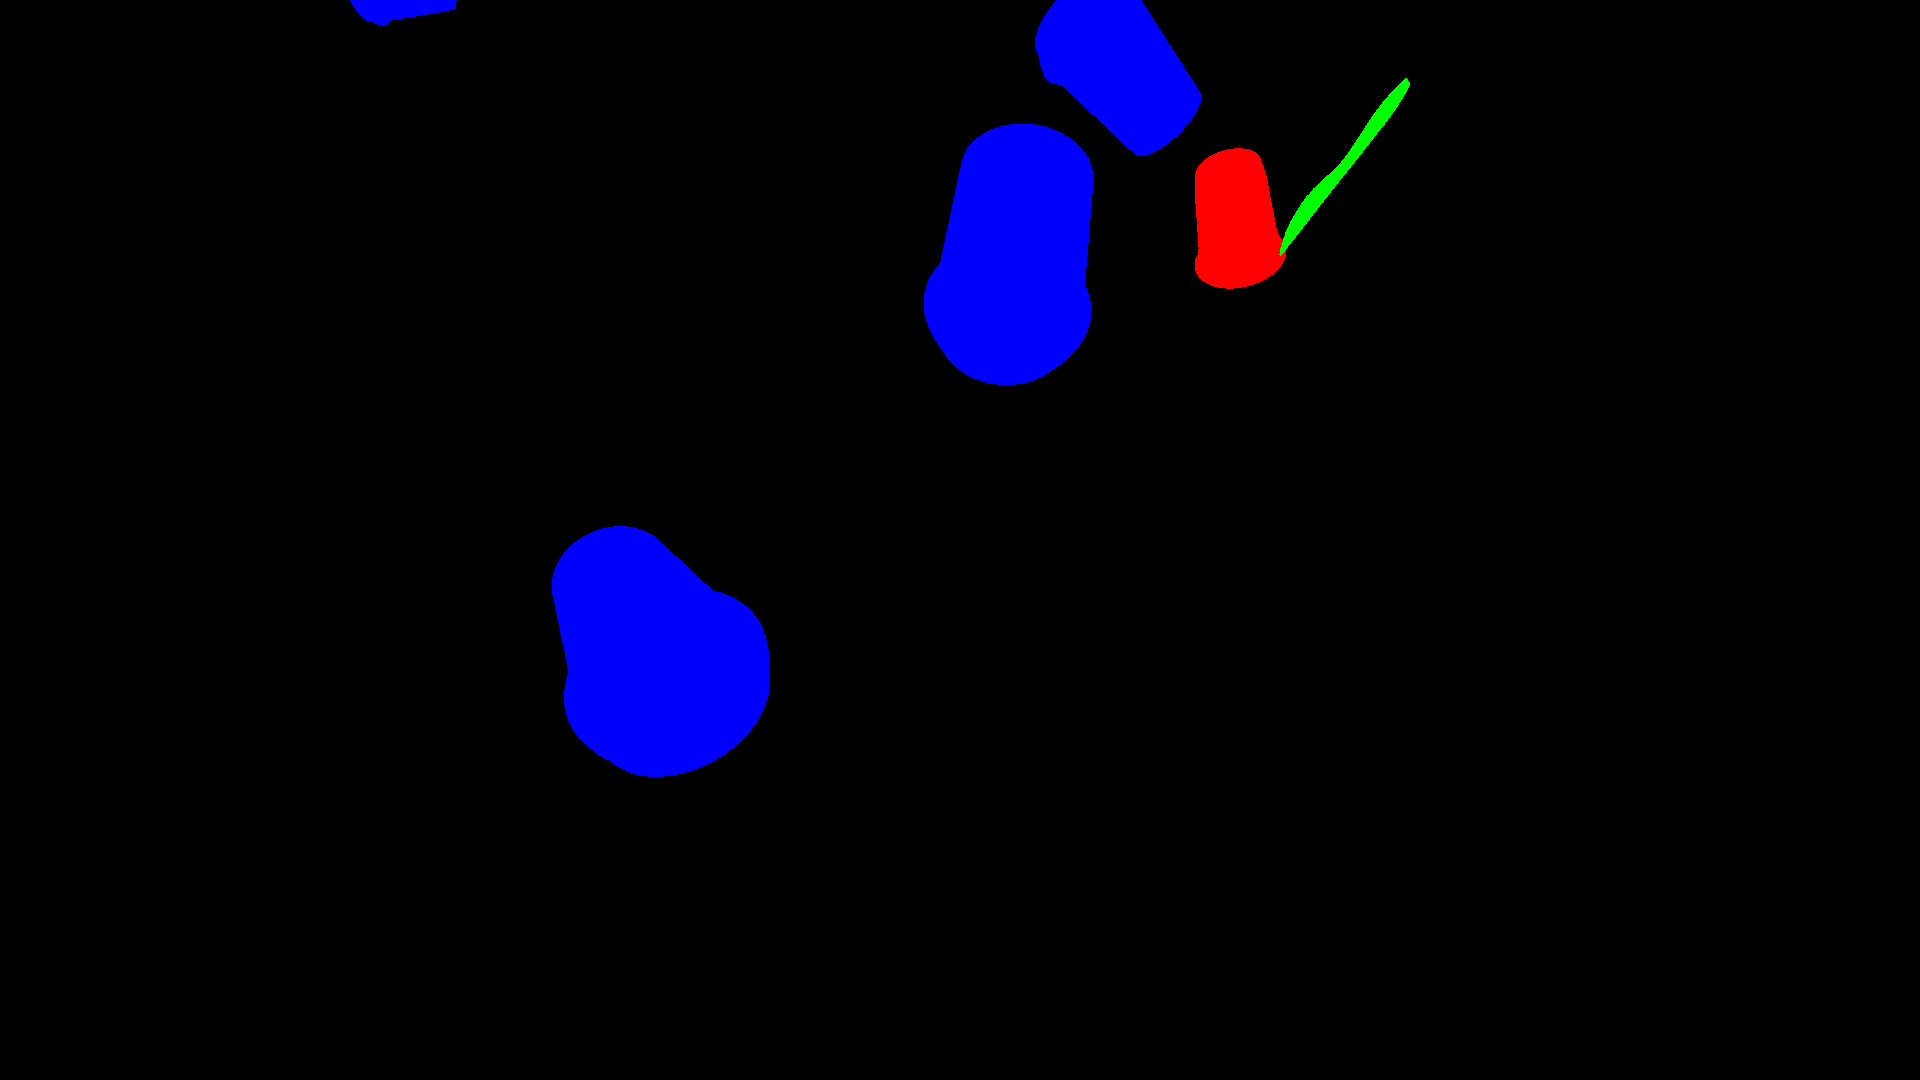

In [10]:
m = MaskManager(dataset_config_path = "/home/redne/mnt/project_zero/project_zero/ds1/experiments/dataset_config/")
m.set_resave_mask(new_mask_path="/home/redne/mnt/project_zero/project_zero/ds1/masks/")
m.start(phase="val", mask_paths=val_set)

print(f'there are {len(m.masks)} images')
m.show_mask_img(len(m.masks)-1)

In [11]:
m.write_masks_to_json(phase="val")

GENERATE COCO 

```
python coco_json_utils.py -md /home/redne/mnt/project_zero/project_zero/ds1/experiments/dataset_config/train_mask_definitions.json -di /home/redne/mnt/project_zero/project_zero/ds1/experiments/dataset_config/dataset_info.json -ph train -dp /home/redne/mnt/project_zero/project_zero/ds1/experiments/dataset_config/
```

and

```
python coco_json_utils.py -md /home/redne/mnt/project_zero/project_zero/ds1/experiments/dataset_config/val_mask_definitions.json -di /home/redne/mnt/project_zero/project_zero/ds1/experiments/dataset_config/dataset_info.json -ph val -dp /home/redne/mnt/project_zero/project_zero/ds1/experiments/dataset_config/
```


```
Processing 51 mask definitions...
  2%|▌                            | 1/51 [00:03<02:43,  3.27s/it]category color not found: (0, 0, 255); check for missing category or antialiasing
  4%|█▏                           | 2/51 [00:06<02:37,  3.22s/it]category color not found: (0, 0, 255); check for missing category or antialiasing
```